##### Name and Roll No of group members
Tanya D Vyas (23510124)
Tarun Kumar(23510125)
Tharasinh Katravath(23510126)
Tiyasha Khatua(23510128)

Problem 1A was peformed by Tarun kumar (23510125) and Tharasingh Katravath(23510126) with equal contribution of 50%
Problem 1B was peformed by Tanya Vyas(23510124) and Tiyasha Khatua(23510128) with equal contribution of 50%
Problem 2 was peformed by all 4 group members together and everyone contributed almost equally about 25%

# Problem 1st part A

# Defining Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
from tqdm import tqdm


# Defing potential V(x)=x^2 that is 1D Harmonic oscillator
# Defining Atomic Units
### Here 1 Hatree(Ha) = 26.211 ev
### and 1 Bohr Radius = 0.59 A



In [2]:
def V(x):
    return x**2

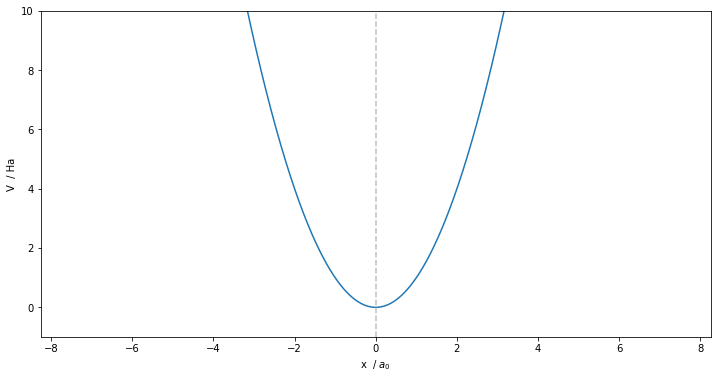

In [3]:
xL = -7.5
xR = 7.5
xm = 0.0
dx = 1./100

plt.figure(figsize=(12,6))
x = np.linspace(xL, xR, 1001)
plt.plot(x, V(x))
plt.axvline(xm, ls='--', c='silver')

plt.ylim(-1, 10)
plt.xlabel(r'x  / $a_0$')
plt.ylabel(r'V  / Ha')
plt.show()

### TISE

The 1D time-independent Schrodinger equation can be written as a set of two coupled first order ODEs:

\begin{eqnarray}
\frac{du}{dx} &=& w \\
\frac{dw}{dx} &=& 2 \left (V(x) - E \right ) u
\end{eqnarray}

which is denoted in a vectorized format as:
\begin{equation}
\frac{d \vec \psi}{dx} = \text{RHS},
\end{equation}
where $\vec \psi = \begin{bmatrix} u(x) \\ w(x) \end{bmatrix}$, 
and $\text{RHS} = \begin{bmatrix} w(x) \\ 2 \left (V(x) - E \right ) u(x) \end{bmatrix}$.

Here \( V(x) = x^2 \)

In [4]:
def dPsi_dx(x, psi, E):
    u, w = psi
    dudx = w
    dwdx = 2 * (V(x) - E) * u
    return np.asarray([dudx, dwdx])

### Use vectorized 2nd order Runge Kutta to solve for the Schrodinger equation in 1-D.

In [5]:
def solveTISE(E, xL, xR, xm, dx):
    x1 = np.linspace(xL, xm, int((xm-xL)/dx)+1)
    psiL = np.zeros((2, len(x1)))
    psiL[:, 0] = [0., 0.1]

    for k in range(1, len(x1)):
        k1 = dPsi_dx(x1[k-1], psiL[:, k-1], E)
        psiL_half = psiL[:, k-1] + k1*dx/2
        k2 = dPsi_dx(x1[k], psiL_half, E)
        psiL[:, k] = psiL[:, k-1] + k2*dx

    x2 = np.linspace(xR, xm, int((xR-xm)/dx)+1)
    psiR = np.zeros((2, len(x2)))
    psiR[:, 0] = [0., -0.1]

    for k in range(1, len(x2)):  
        k1 = dPsi_dx(x2[k-1], psiR[:, k-1], E)
        psiR_half = psiR[:, k-1] - k1*dx/2 
        k2 = dPsi_dx(x2[k], psiR_half, E)
        psiR[:, k] = psiR[:, k-1] - k2*dx

    C = np.sign(psiR[0, -1]/psiL[0, -1]) 
    psiR = C * psiR

    return psiL, psiR

# Defining Junction condition

In [6]:
def juncCondn(E):
    xL, xR, xm, dx = -7.5, 7.5, 0.0, 1./200
    psiL, psiR = solveTISE(E, xL, xR, xm, dx)
    jump = psiL[1, -1]/psiL[0, -1] - psiR[1, -1]/psiR[0, -1]
    return jump


### Scan the energy landscape

This will allow us to find 'approximate' eigen-values of the energy

In [7]:
jc = []
En = []

# Find eigenvalues
for E in tqdm(np.arange(0, 21, 0.005)):
    En.append(E)
    jc.append(juncCondn(E))

jc = np.asarray(jc)
En = np.asarray(En)

100%|██████████| 4200/4200 [03:19<00:00, 21.10it/s]


## Finding Aproximate eigen value by bisection method

In [8]:
# Where does the juncCondn change sign
idx = np.where(jc[:-1] * jc[1:] < 0)[0] + 1
EigValues = np.zeros(len(idx))

# Bisect to find eigenvalues accurately
for j in range(len(idx)):
    a = En[idx[j]-1]
    b = En[idx[j]+1]
    EigValues[j] = bisect(juncCondn, a, b)
    print(f"Approximate eigValue: {En[idx[j]]}, True eigValue: {EigValues[j]}")


Approximate eigValue: 0.705, True eigValue: 0.7047273919254077
Approximate eigValue: 2.12, True eigValue: 2.1165437195415144
Approximate eigValue: 3.5300000000000002, True eigValue: 3.529521745477105
Approximate eigValue: 4.945, True eigValue: 4.942474476856877
Approximate eigValue: 6.36, True eigValue: 6.355698964007898
Approximate eigValue: 7.7700000000000005, True eigValue: 7.768898402858759
Approximate eigValue: 9.185, True eigValue: 9.182221221966902
Approximate eigValue: 10.6, True eigValue: 10.595519051154843
Approximate eigValue: 12.01, True eigValue: 12.008884627573426
Approximate eigValue: 13.425, True eigValue: 13.422225237408421
Approximate eigValue: 14.84, True eigValue: 14.835605782201746
Approximate eigValue: 16.25, True eigValue: 16.24896137311706
Approximate eigValue: 17.665, True eigValue: 17.662340677968462
Approximate eigValue: 19.080000000000002, True eigValue: 19.07569503753097
Approximate eigValue: 20.490000000000002, True eigValue: 20.489062685366957



\begin{align*}
E_n &= (n + \frac{1}{2}) \hbar \omega \\
\text{For ground state we have } E_0 &= \frac{1}{2} \hbar \omega \\
\text{Theoretically } V(x) &= \frac{1}{2} m \omega^2 x^2 \\
\text{Here we have taken } V(x) &= x^2 \\
\text{That is } m &= 1 \text{, thus } \frac{1}{2} m \omega^2 = 1 \\
\text{From here } \omega &= \sqrt{2} = 1.41421356237 \\
\text{Thus, Numerically computed ground state} &= 0.7047273919265536
\end{align*}



In [9]:
# Find the lowest eigenvalue (ground state energy)
ground_state_energy = bisect(juncCondn, 0.1, 2)
print("Numerically computed ground state energy:", ground_state_energy)

# Define constants
h_bar = 1  # Reduced Planck constant (h_bar = h/2pi for convenience)
omega = 1.41421356237 # Angular frequency of the oscillator

# Expected ground state energy eigenvalue of the quantum harmonic oscillator
expected_ground_state_energy = h_bar * omega / 2
print("Expected ground state energy eigenvalue:", expected_ground_state_energy)

Numerically computed ground state energy: 0.7047273919265536
Expected ground state energy eigenvalue: 0.707106781185


## Plotting between eigen functions and Potential

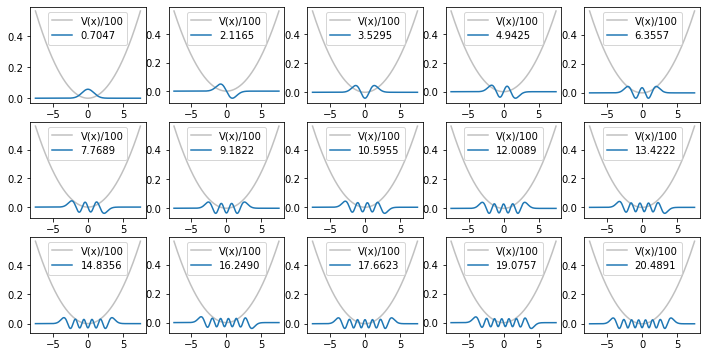

In [10]:
psi_vec = []

plt.figure(figsize=(12, 6))
for j in range(len(idx)):
    plt.subplot(3, 5, j+1)
    psiL, psiR = solveTISE(EigValues[j], -7.5, 7.5, 1.0, 1./200)
    psi = np.hstack((psiL[0, :], np.flipud(psiR[0, :-1])))
    x = np.arange(-7.5, 7.5+(1./200), 1./200)
    plt.plot(x, V(x)/100, '-', c='silver', label='V(x)/100')
    plt.plot(x, psi/np.linalg.norm(psi), label=f"{EigValues[j]:.4f}")
    psi_vec.append(psi/np.linalg.norm(psi))
    plt.legend()
plt.show()

## showing equispaced eigen values 

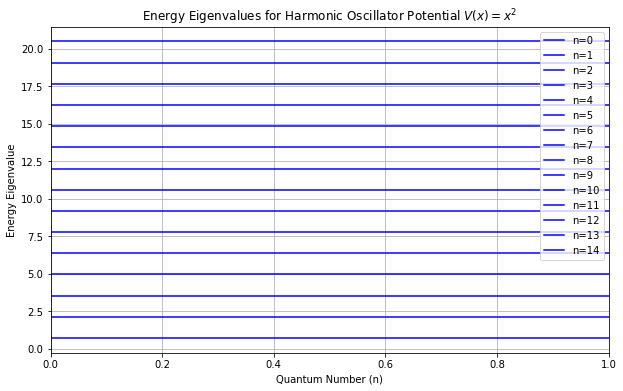

In [11]:
plt.figure(figsize=(10, 6))

# Plot horizontal lines at each energy eigenvalue
for n, energy in enumerate(EigValues[:15]):  # Plot up to n=14
    plt.axhline(y=energy, linestyle='-', color='b', label=f'n={n}')

plt.xlabel('Quantum Number (n)')
plt.ylabel('Energy Eigenvalue')
plt.title('Energy Eigenvalues for Harmonic Oscillator Potential $V(x) = x^2$')
plt.grid(True)
plt.legend()
plt.show()


## plotted equispaced eigenvalues with Harmonic Oscillator Potential

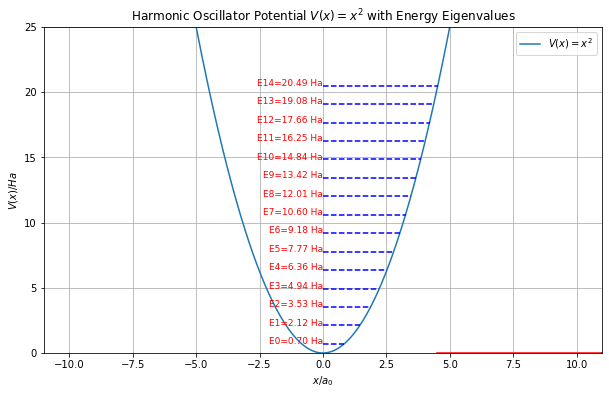

In [13]:
# Define a0 (arbitrary scaling factor)
a0 = 1.0

# Generate x values for plotting
x_values = np.linspace(-10, 10, 1000)

# Plot the potential
plt.figure(figsize=(10, 6))
plt.plot(x_values/a0, V(x_values), label='$V(x) = x^2$')

# Plot the energy eigenvalues as points and extend lines
for idx, energy in enumerate(EigValues):
    plt.axhline(0, energy, color='red', zorder=5)
    plt.text(0, energy, f'E{idx}={energy:.2f} Ha', fontsize=9, color='red', ha='right')
    # Calculate the x-coordinate where the potential ends
    x_end = np.sqrt(energy)
    # Plot lines from energy eigenvalue points to the end of the potential
    plt.plot([0, x_end], [energy, energy], color='blue', linestyle='--')

plt.xlabel('$x/a_0$')
plt.ylabel('$V(x)/Ha$')
plt.title('Harmonic Oscillator Potential $V(x) = x^2$ with Energy Eigenvalues')
plt.ylim(0, 25)  # Limiting y-axis to show only up to 20 Ha
plt.legend()
plt.grid(True)
plt.show()

$|\psi\rangle = \frac{1}{\sqrt{2}} |\psi_0\rangle + \frac{1}{\sqrt{2}} |\psi_1\rangle$
#### and thus Caluculate expectation value  T(Kinetic Energy),V(Potential Energy),E(Total Energy)

In [14]:
len(psi_vec)
#print(psi_vec)
psii = (1/np.sqrt(2))*(psi_vec[0] + psi_vec[1])
print(psii)

x = np.arange(-7.5,7.5+(1/200),1/200)

T = np.dot(psii,-0.5*np.gradient(np.gradient(psii,x),x))
print("Expectation value of T:",T )
P = np.dot(psii,x**2*psii)
print("Expectation value of V:",P )

#print(EigValues[0],EigValues[1])
E = 0.5 *(EigValues[0]* np.dot(psi_vec[0],psi_vec[0])+ EigValues[1]* np.dot(psi_vec[1],psi_vec[1]))
print("Expectation value of E:",E) 

[ 0.00000000e+00  3.16788602e-19  6.34435127e-19 ... -5.39809751e-19
 -2.69541434e-19  0.00000000e+00]
Expectation value of T: 0.705652853295762
Expectation value of V: 0.7075918047045876
Expectation value of E: 1.410635555733461


### Above \begin{align*}
E_0 &= \frac{1}{2} \hbar \omega = 0.7047273919265536 \\
E_1 &= \frac{3}{2} \hbar \omega = 2.12132034356 \\
\langle E \rangle &= \frac{1}{2}(E_0 + E_1) = \hbar \omega = 1.4142135624
\end{align*}
### Also our Expectation value= 1.410635555733461 thus our answer is matching our intution

###  The expectation value of T and V is equal in Harmonic oscillator.
#### From Virial Theorem we know that 
$\langle T \rangle = \frac{n}{2} \langle V \rangle$ \
Here the wavefunction is the wavefunction of harmonic oscillator. So $V = x^2$ \
That is $n = 2$ \
Therefore, $\langle T \rangle = \frac{2}{2} \langle V \rangle$ \
So, $\langle T \rangle = \langle V \rangle$
### Analytically we prove that expectation value of T = expectation value of V 

### From the above coding we see that both are equal.



# Problem 1 b 1.

The Numerov method is a computational technique utilized to solve ordinary differential equation in the form
$$y''(x) + f(x)y = 0$$
where f(x) represents a function of x. This method is most effective for second-order linear ODEs that solely contain a second derivative term.

In case where the equation involves a first-derivative term, such as :
$$y''(x)+p(x)y'(x) + q(x)y(x) = f(x)$$
where p(x) and q(x) are function of x, the direct application of Numerov method is not feasible. This limitation arises from the method's reliance on a specific ODE form that excludes a first derivative term.
Also Numerov method approximates the second derivatives of the function at agiven point using the value of the function at the neighboring points. If there is a first-derivative term present ,then the method may not be able to accurately approximate the second derivative due to the additional term

# Problem 1B 2

The given second order ODE is $$\frac{d^2\ y (x)}{dx^2} + f(x)\ y (x) = 0 \rightarrow eq. \textbf{1} $$
Sum of taylor series expansion of $\ y(x+h)$ and $\ y(x-h)$ is: $$\ y(x+h)+\ y(x-h) = 2\ y(x)+h^2\ y^{(2)}(x)+ \frac{h^4}{12} y^{(4)}(x)+O(h^6)\rightarrow eq. \textbf{2}$$
Acting $(1+\frac{h^2}{12}\frac{d^2}{dx^2})$ on eq. 1, we get
$$y^{(2)}(x) + \frac{h^2}{12}y^{(4)}(x) + f(x)y(x) + \frac{h^2}{12}\frac{d^2}{dx^2}[f(x)y(x)] =0 \rightarrow eq.\textbf{3}$$

Substituting values of Equation 3 into 2 , we get and expanding $\frac{d^2}{dx^2}[f(x)y(x)] \approx \frac{f(x+h)y(x+h)+f(x-h)y(x-h)-2f(x)y(x)}{h^2}$ using elementary differential method we get:

$$y(x+h) = \frac{2(1-\frac{5}{12}h^2f(x))y(x)-(1+\frac{1}{12}h^2f(x-h))y(x-h)}{1+ \frac{1}{12}h^2f(x+h)}+ O(h^6)\rightarrow eq. \textbf{4}$$

$$y_{n+1} = \frac{2(1-\frac{5}{12}h^2f_n)y_n-(1+\frac{1}{12}h^2f_{n-1})y_{n-1}}{1+\frac{1}{12}h^2f_{n+1}} \rightarrow eq. \textbf{5} $$
#### We obtained three term recursion relation in eq. 5. Three values $y(x)$, $y(x+h)$ and $y(x-h)$ are related in one equation.


Numerov method is said that it is self-starting because Numerov's approach requires two initial values, y(x-h) and y(x), to start the recursive process, it does not behave in a self-starting manner. Before the approach can be applied properly, it is necessary to have prior knowledge of the function values at two surrounding sites.


Numerov's technique uses a higher-order approximation for the derivative, which makes it faster than the traditional RK2 or RK4 methods. As a result, fewer function evaluations are needed to arrive at a more accurate solution. As such, Numerov's method, in contrast to the RK2 and RK4 methods, can handle issues with a bigger step size and lower computing costs.

# Problem 1B 3.

The given ordinary differential equation is 
$$y''(x) + f(x)y = 0\rightarrow eq. \textbf{1}$$

For using central diiference method we have to find $$y(x+h)- y(x+h)$$
Using Taylor Series expansion 
$$y(x+h) = y(x) + {y'(x)}h +\frac{y''(x)}{2}h^2 + \frac{y'''(x)}{6}h^3 + O(h^4)\rightarrow eq. \textbf{2} $$
$$y(x-h) = y(x) - {y'(x)}h +\frac{y''(x)}{2}h^2 - \frac{y'''(x)}{6}h^3 + O(h^4)\rightarrow eq. \textbf{3} $$

Now taking difference eq 2 and 3 $$y(x+h) - y(x-h) = 2{y'(x)}h +  \frac{y'''(x)}{3}h^3 + O(h^5)\rightarrow eq. \textbf{4} $$
Our given equation is $y''(x) + f(x)y = 0$.
Differentiate this equation with respect to x
$$y'''(x) + \frac{d[f(x)y(x)]}{dx} = 0 \rightarrow eq. \textbf{5}$$
Let $$ \frac{df(x)y(x)}{dx} \approx \frac {f(x+h) - f(x-h)}{2h} + O(h^2)\rightarrow eq. \textbf{6} $$ 

Putting eq.6 into eq.5 and then eq.5 into eq.4 we get
$$y(x+h) - y(x-h) = 2{y'(x)}h - \frac {f(x+h) y(x+h)- f(x-h) y(x-h)}{6} + O(h^5)\rightarrow eq. \textbf{7} $$
 Rearranging eq.7 we get 
 $$y'(x) = \frac {[(1 + \frac {h^2}{6} f(x+h))y(x+h)-(1 + \frac {h^2}{6} f(x-h))y(x-h)]}{2h} + O(h^4)\rightarrow eq. \textbf{8} $$
So we can write 
$$y'_i = \frac {[(1 + \frac {h^2}{6} f_{i+1})y_{i+1}-(1 + \frac {h^2}{6} f_{i-1})y_{i-1}]}{2h} + O(h^4) $$
#### This is the required result. This expression can be used for wave function matching quantum physics problems.

# Problem 2

## Shooting method to find the eigenvalues

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#-- These functions are available (among others) for finding root of functions
from scipy.optimize import bisect
from scipy.optimize import fsolve
from scipy.optimize import newton
from scipy.optimize import brentq

from tqdm import tqdm

In [16]:
@np.vectorize
def V(x):
    V0 = -6.  # atomic units
    a = 0.5   # atomic units
    
    if np.abs(x) <= a:
        return V0
    else:
        return 0.

### Plot the potential (to make sure it looks right)

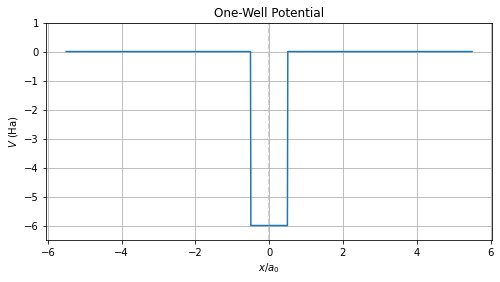

In [17]:
xL = -5.5  # Left boundary for x
xR = 5.5   # Right boundary for x
xm = 0.0   # Position for vertical dashed line

plt.figure(figsize=(8, 4))
x = np.linspace(xL, xR, 1001)
plt.plot(x, V(x))
plt.axvline(xm, ls='--', c='silver')
plt.ylim(-6.5, 1)
plt.xlabel(r'$x/a_0$')
plt.ylabel(r'$V$ (Ha)')
plt.title('One-Well Potential')
plt.grid(True)
plt.show()

### TISE

The 1D time-independent Schrodinger equation can be written as a set of two coupled first order ODEs:

\begin{eqnarray}
\frac{du}{dx} &=& w \\
\frac{dw}{dx} &=& 2 \left (V(x) - E \right ) u
\end{eqnarray}

which is denoted in a vectorized format as:
\begin{equation}
\frac{d \vec \psi}{dx} = \text{RHS},
\end{equation}
where $\vec \psi = \begin{bmatrix} u(x) \\ w(x) \end{bmatrix}$, 
and $\text{RHS} = \begin{bmatrix} w(x) \\ 2 \left (V(x) - E \right ) u(x) \end{bmatrix}$.


In [18]:
def dPsi_dx(x, psi, E):
    
    u, w = psi
    
    dudx = w
    dwdx = 2*(V(x) - E)*u
    
    dpsidx = [dudx, dwdx]
    
    return np.asarray(dpsidx)

### Use vectorized 2nd order Runge Kutta  and Numerov's method to solve for the Schrodinger equation in 1-D.
### Numerov's method:

$$ \Psi_{n+1} = \frac{2\left(1-\frac{5}{12}h^2f_n\right)\Psi_n - \left(1+\frac{1}{12}h^2f_{n-1}\right)\Psi_{n-1}}{1+\frac{1}{12}h^2f_{n+1}} $$

$$ f(x) = \frac{2m}{\hbar^2}(E - V(x)) $$
$$\psi'_i = \frac {[(1 + \frac {h^2}{6} f_{i+1})\Psi_{i+1}-(1 + \frac {h^2}{6} f_{i-1})\Psi_{i-1}]}{2h} + O(h^4) $$





In [19]:

def solveTISE(E, xL, xR, xm, dx):
    # We will use a vectorized form of RK2 solver

    def f(x):
        return 2 * (E - V(x))

    #-- Left --> Right solution in the domain [xL, xm]
    x1 = np.linspace(xL, xm+dx, int((xm-xL)/dx)+2)
    psiL = np.zeros((2, len(x1)))
    psiL[:, 0] = [0., 0.1]    #-- initial condition
    
    k1 = dPsi_dx(x1[0], psiL[:, 0], E)
    psiL_half = psiL[:,0] + k1*dx/2
    k2 = dPsi_dx(x1[1], psiL_half, E)
    psiL[:, 1] = psiL[:,0] + k2*dx
    
    
    for i in range(2, len(x1)):
        psiL[0 , i] = (2 * psiL[0 ,i-1] * (1 - (5/12)*dx**2*f(x1[i-1])) - psiL[0, i-2] * (1 + (1/12)*dx**2*f(x1[i-2]))) / (1 + (1/12)*dx**2*f(x1[i]))
        psiL[1, i-1] = ((1 + dx**2 *f(x1[i])/6)*psiL[0,i] -  (1 + dx**2 *f(x1[i-2])/6)*psiL[0,i-2])/(dx*2)
    #-- Right --> Left solution in the domain [xR, xm]
    x2 = np.linspace(xR, xm - dx, int((xR-xm)/dx)+2)
    psiR = np.zeros((2, len(x2)))
    psiR[:, 0] = [0., -0.1]   #-- initial condition
    
    
    k1 = dPsi_dx(x2[0], psiL[:, 0], E)
    psiL_half = psiR[:,0] - k1*dx/2
    k2 = dPsi_dx(x2[1], psiL_half, E)
    psiR[:, 1] = psiR[:,0] - k2*dx
    
    
    for i in range(2, len(x2)):  
        psiR[0, i] = (2 * psiR[0, i-1] * (1 - (5/12)*dx**2*f(x2[i-1])) - psiR[0, i-2] * (1 + (1/12)*dx**2*f(x2[i-2]))) / (1 + (1/12)*dx**2*f(x2[i]))
        psiR[1, i-1] = -((1 + dx**2 *f(x2[i]))*psiR[0,i] -  (1 + dx**2 *f(x2[i-2]))*psiR[0,i-2])/(dx*2)
    
    #-- adjust the sign between L and R solutions
    C = np.sign(psiR[0, -2]/psiL[0, -2]) 
    psiR = C * psiR

    return psiL, psiR


In [20]:
@np.vectorize
def juncCondn(E):
    
    xL, xR, xm, dx = -7.5, 7.5, 0.0, 1./100

    psiL, psiR = solveTISE(E, xL, xR, xm, dx)
   
    jump = psiL[1, -2]/psiL[0, -2] - psiR[1, -2]/psiR[0, -2]

    return jump

### Scan the energy landscape

This will allow us to find 'approximate' eigen-values of the energy

In [21]:
jc = []
En = []
for E in tqdm(np.arange(-6, 0, .005)):
    En.append(E)
    jc.append(juncCondn(E))

jc = np.asarray(jc)
En = np.asarray(En)

100%|██████████| 1200/1200 [04:07<00:00,  4.84it/s]


In [22]:
#-- Where does the juncCondn change sign
#-- The eigenvalues are likely to be found near these points

idx = np.where(jc[:-1] * jc[1:] < 0 )[0] +1

EigValues = np.zeros(len(idx))

for j in range(len(idx)):
    a = En[idx[j]-1]
    b = En[idx[j]+1]
    EigValues[j] = bisect(juncCondn, a, b)
    print (j+1, 'approximate eigValue =', En[idx[j]], 'True eigValue =', EigValues[j])

1 approximate eigValue = -4.12500000000004 True eigValue = -4.125858106630662
2 approximate eigValue = -0.1450000000001248 True eigValue = -0.1465605630528964


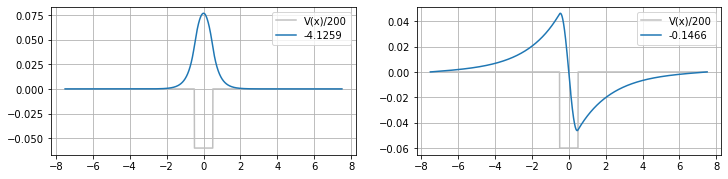

In [23]:
plt.figure(figsize=(12,6))

for j in range(len(idx)):

    plt.subplot(2, 2, j+1)
    psiL, psiR = solveTISE(EigValues[j], -7.5, 7.5, 0.1, 1./200)
    
    psi = np.hstack( (psiL[0, :-1], np.flipud(psiR[0, :-2])) )

    x = np.arange(-7.5, 7.5+(1./200), 1./200)
    plt.plot(x, V(x)/100, '-', c='silver', label='V(x)/200')
    plt.plot(x, psi/np.linalg.norm(psi), label='%.4f'%(EigValues[j]))
    
    plt.legend()
    plt.grid()


plt.show()

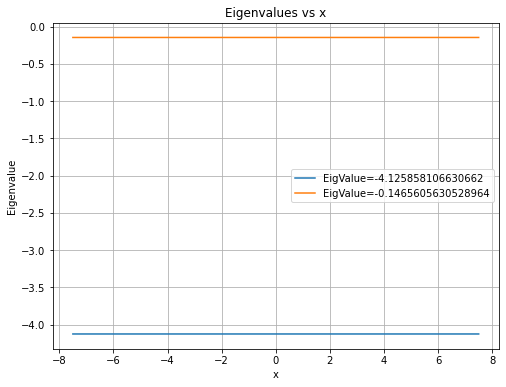

In [24]:
plt.figure(figsize=(8,6))

for eig_value in EigValues:
    plt.plot(x, np.full_like(x, eig_value), label=f'EigValue={eig_value}')

plt.xlabel('x')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues vs x')
plt.legend()
plt.grid(True)
plt.show()

# 2 Potential well

In [25]:
@np.vectorize
def V(x):
    V0 = -6.0  # atomic units
    a = 2.5   # atomic units
    b = 0.5
    
    if np.abs(x) >= b/2 and np.abs(x) <= a/2:
        return V0
    else:
        return 0.

# Plot the potential (to make sure it looks right)

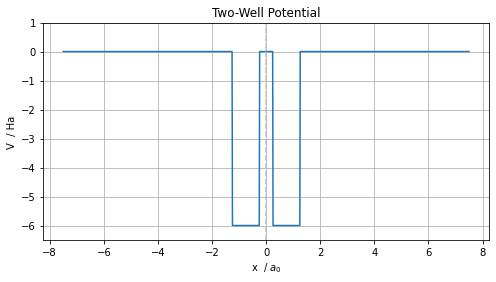

In [26]:
xL = -7.5
xR = 7.5
xm = 0.0
dx = 1./200

plt.figure(figsize=(8,4))
x = np.linspace(xL, xR, 1001)
plt.plot(x, V(x))
plt.axvline(xm, ls='--', c='silver')

plt.ylim(-6.5, 1)
plt.xlabel(r'x  / $a_0$')
plt.ylabel(r'V  / Ha')
plt.title('Two-Well Potential')
plt.grid()

plt.show()

# Scan the energy landscape
## This will allow us to find 'approximate' eigen-values of the energy

In [27]:
jc = []
En = []
for E in tqdm(np.arange(-6, 0, .005)):
    En.append(E)
    jc.append(juncCondn(E))

jc = np.asarray(jc)
En = np.asarray(En)

100%|██████████| 1200/1200 [05:18<00:00,  3.77it/s]


In [28]:
#-- Where does the juncCondn change sign
#-- The eigenvalues are likely to be found near these points

idx = np.where(jc[:-1] * jc[1:] < 0 )[0] +1

EigValues = np.zeros(len(idx))

for j in range(len(idx)):
    a = En[idx[j]-1]
    b = En[idx[j]+1]
    EigValues[j] = bisect(juncCondn, a, b)
    print (j+1, 'approximate eigValue =', En[idx[j]], 'True eigValue =', EigValues[j])

1 approximate eigValue = -4.375000000000035 True eigValue = -4.37860093277766
2 approximate eigValue = -3.8600000000000456 True eigValue = -3.864191461534984
3 approximate eigValue = -0.3000000000001215 True eigValue = -0.3000596098032598


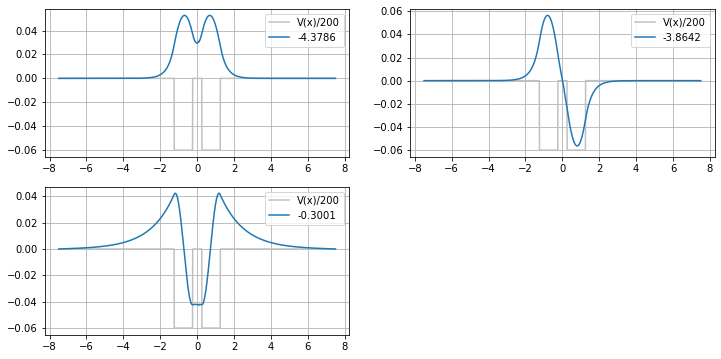

In [29]:
plt.figure(figsize=(12,6))

for j in range(len(idx)):

    plt.subplot(2, 2, j+1)
    psiL, psiR = solveTISE(EigValues[j], -7.5, 7.5, 0.1, 1./200)
    
    psi = np.hstack( (psiL[0, :-1], np.flipud(psiR[0, :-2])) )

    x = np.arange(-7.5, 7.5+(1./200), 1./200)
    plt.plot(x, V(x)/100, '-', c='silver', label='V(x)/200')
    plt.plot(x, psi/np.linalg.norm(psi), label='%.4f'%(EigValues[j]))
    
    plt.legend()
    plt.grid()


plt.show()

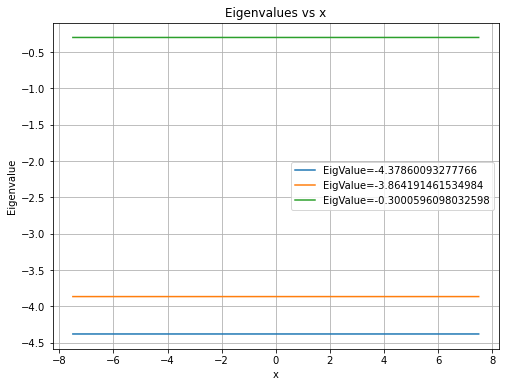

In [30]:
plt.figure(figsize=(8,6))

for eig_value in EigValues:
    plt.plot(x, np.full_like(x, eig_value), label=f'EigValue={eig_value}')

plt.xlabel('x')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues vs x')
plt.legend()
plt.grid(True)
plt.show()

### Excited states of the single well does not split  
By introducing a double well potential, we are essentially forming two distinct potential wells separated by a barrier. Let's now examine the ground state. 
Splitting into Two Levels:
In the presence of the double well potential, the ground state $E_0$
  of the single well splits into two levels due to tunneling. One level will be slightly lower in energy than $E_0$
 , and the other will be slightly higher than $E_0$.
 So, we have:$\\$
$E_0−$ (slightly lower than $E_0$), 
$E_0+$ (slightly higher than $E_0$).
The excited states do not split as they have higher energy and are not greatly affected by tunelling effects.

# 4 POTENTIAL WELL

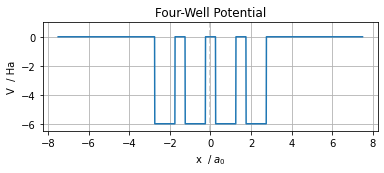

In [31]:
@np.vectorize
def V(x):
    V0 = -6.  # atomic units
    a = 1.25   # atomic units
    b = 0.25
    c = 2.75
    d = 1.75
    if np.abs(x) >= b and np.abs(x) <= a:
        return V0
    elif np.abs(x) >= d and np.abs(x) <= c:
        return V0
    else:
        return 0.
    
xL = -7.5
xR = 7.5
xm = 0.0
dx = 1./100

plt.figure(figsize=(6,2))
x = np.arange(xL, xR, 0.005)
plt.plot(x, V(x))
plt.axvline(xm, ls='--', c='silver')
plt.ylim(-6.5, 1)
plt.xlabel(r'x  / $a_0$')
plt.ylabel(r'V  / Ha')
plt.title('Four-Well Potential')
plt.grid()

plt.show()

In [32]:
jc = []
En = []
for E in tqdm(np.arange(-6, 0, .005)):
    En.append(E)
    jc.append(juncCondn(E))

jc = np.asarray(jc)
En = np.asarray(En)

100%|██████████| 1200/1200 [07:02<00:00,  2.84it/s]


In [33]:
#-- Where does the juncCondn change sign
#-- The eigenvalues are likely to be found near these points

idx = np.where(jc[:-1] * jc[1:] < 0 )[0] +1

EigValues = np.zeros(len(idx))

for j in range(len(idx)):
    a = En[idx[j]-1]
    b = En[idx[j]+1]
    EigValues[j] = bisect(juncCondn, a, b)
    print (j+1, 'approximate eigValue =', En[idx[j]], 'True eigValue =', EigValues[j])

1 approximate eigValue = -4.510000000000032 True eigValue = -4.5132255701825805
2 approximate eigValue = -4.300000000000036 True eigValue = -4.301375215478509
3 approximate eigValue = -3.985000000000043 True eigValue = -3.9893578479101843
4 approximate eigValue = -3.6700000000000497 True eigValue = -3.6711899645452415
5 approximate eigValue = -0.4450000000001184 True eigValue = -0.4462142290117937
6 approximate eigValue = -0.010000000000127685 True eigValue = -0.011715628249931205


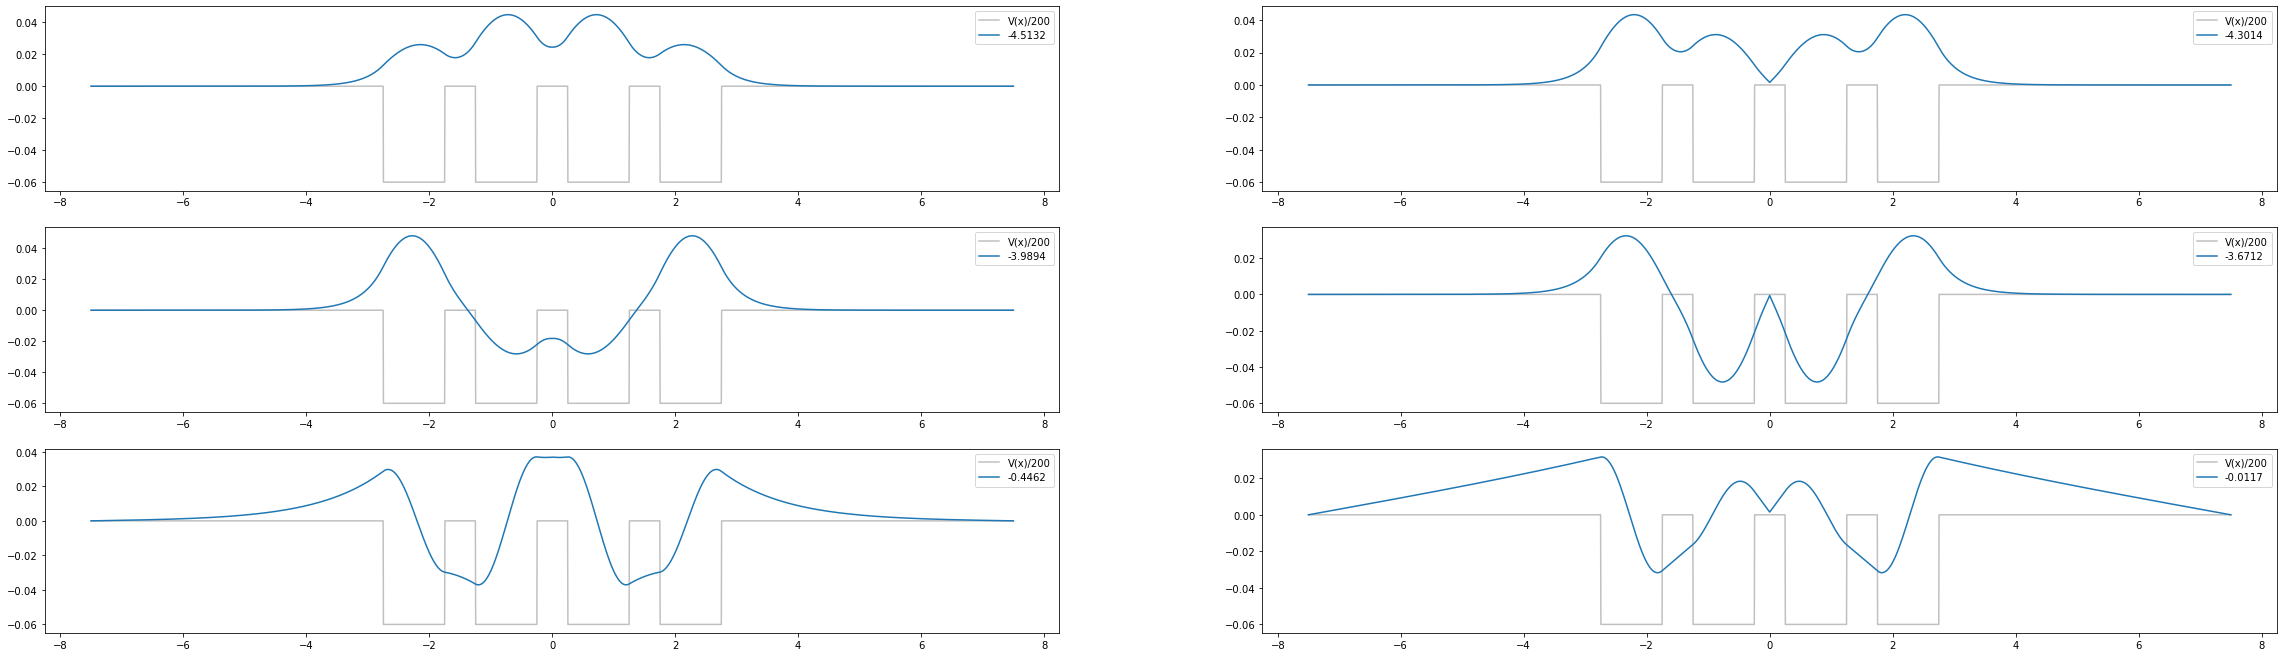

In [34]:
plt.figure(figsize=(40,40))

for j in range(len(idx)):

    plt.subplot(10, 2, j+1)
    psiL, psiR = solveTISE(EigValues[j], -7.5, 7.5, 0.0, 1./200)
    
    psi = np.hstack( (psiL[0, :-1], np.flipud(psiR[0, :-2])) )

    x = np.arange(-7.5, 7.5+(1./200), 1./200)
    plt.plot(x, V(x)/100, '-', c='silver', label='V(x)/200')
    plt.plot(x, psi/np.linalg.norm(psi), label='%.4f'%(EigValues[j]))
    
    plt.legend()


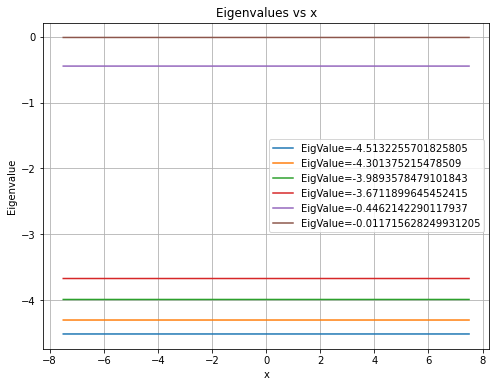

In [35]:
plt.figure(figsize=(8,6))

for eig_value in EigValues:
    plt.plot(x, np.full_like(x, eig_value), label=f'EigValue={eig_value}')

plt.xlabel('x')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues vs x')
plt.legend()
plt.grid(True)
plt.show()

# 8 Potential well

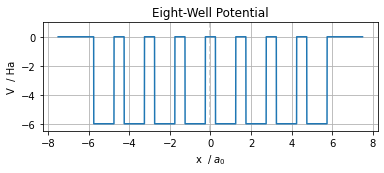

In [36]:
@np.vectorize
def V(x):
    V0 = -6.  # atomic units
    a = 1.25   # atomic units
    b = 0.25
    c = 2.75
    d = 1.75
    e = 4.25
    f = 3.25
    g = 5.75
    j = 4.75
    if np.abs(x) >= b and np.abs(x) <= a:
        return V0
    elif np.abs(x) >= d and np.abs(x) <= c:
        return V0
    elif np.abs(x) >= f and np.abs(x) <= e:
        return V0
    elif np.abs(x) >= j and np.abs(x) <= g:
        return V0
    else:
        return 0.
    
xL = -7.5
xR = 7.5
xm = 0.0
plt.figure(figsize=(6,2))
x = np.arange(xL, xR, 0.001)
plt.plot(x, V(x))
plt.axvline(xm, ls='--', c='silver')

plt.ylim(-6.5, 1)
plt.xlabel(r'x  / $a_0$')
plt.ylabel(r'V  / Ha')
plt.title('Eight-Well Potential')
plt.grid()

plt.show()

In [37]:
jc = []
En = []
for E in tqdm(np.arange(-6, 0, .005)):
    En.append(E)
    jc.append(juncCondn(E))

jc = np.asarray(jc)
En = np.asarray(En)

100%|██████████| 1200/1200 [09:20<00:00,  2.14it/s]


In [38]:
#-- Where does the juncCondn change sign
#-- The eigenvalues are likely to be found near these points

idx = np.where(jc[:-1] * jc[1:] < 0 )[0] +1

EigValues = np.zeros(len(idx))

for j in range(len(idx)):
    a = En[idx[j]-1]
    b = En[idx[j]+1]
    EigValues[j] = bisect(juncCondn, a, b)
    print (j+1, 'approximate eigValue =', En[idx[j]], 'True eigValue =', EigValues[j])

1 approximate eigValue = -4.560000000000031 True eigValue = -4.564765725604986
2 approximate eigValue = -4.495000000000032 True eigValue = -4.498344171602544
3 approximate eigValue = -4.390000000000034 True eigValue = -4.390358172991579
4 approximate eigValue = -4.245000000000037 True eigValue = -4.2456060417497445
5 approximate eigValue = -4.070000000000041 True eigValue = -4.072510912342737
6 approximate eigValue = -3.885000000000045 True eigValue = -3.88541166022308
7 approximate eigValue = -3.705000000000049 True eigValue = -3.707877628848704
8 approximate eigValue = -3.570000000000052 True eigValue = -3.574706608929025
9 approximate eigValue = -0.5350000000001165 True eigValue = -0.5361098204239971
10 approximate eigValue = -0.32500000000012097 True eigValue = -0.32791602045426127


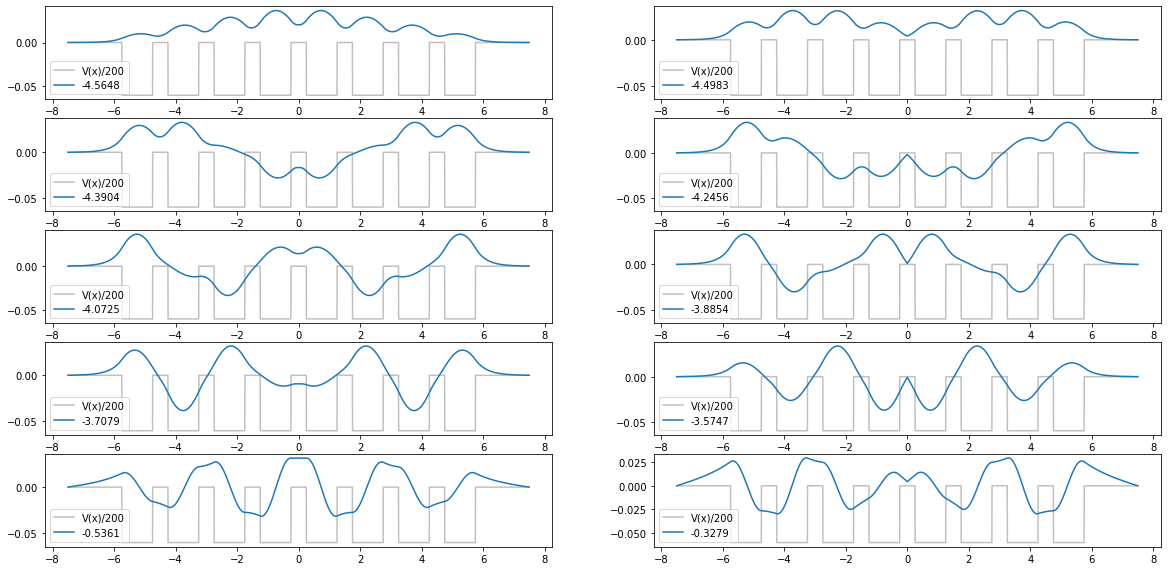

In [39]:
plt.figure(figsize=(20,12))

for j in range(len(idx)):

    plt.subplot(6, 2, j+1)
    psiL, psiR = solveTISE(EigValues[j], -7.5, 7.5, 0.0, 1./200)
    
    psi = np.hstack( (psiL[0, :-1], np.flipud(psiR[0, :-2])) )

    x = np.arange(-7.5, 7.5+(1./200), 1./200)
    plt.plot(x, V(x)/100, '-', c='silver', label='V(x)/200')
    plt.plot(x, psi/np.linalg.norm(psi), label='%.4f'%(EigValues[j]))
    
    plt.legend()


plt.show()


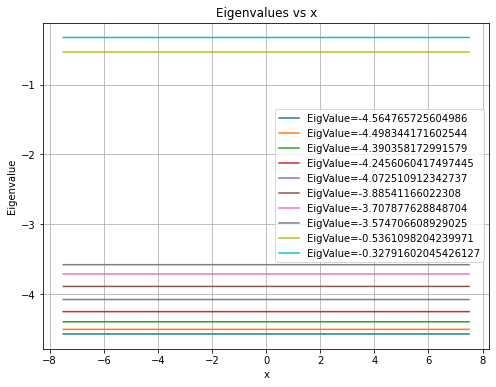

In [40]:
plt.figure(figsize=(8,6))

for eig_value in EigValues:
    plt.plot(x, np.full_like(x, eig_value), label=f'EigValue={eig_value}')

plt.xlabel('x')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues vs x')
plt.legend()
plt.grid(True)
plt.show()